# Import modules


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dense , Flatten , Dropout


/home/xikram/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/xikram/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/xikram/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/xikram/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

Load the data

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path  = os.path.join(cur_path , 'train' , str(i))
    images = os.listdir(path)
    
    for a in images:
        #try:
        image = Image.open( path + '/' + a)
        image = image.resize((30 , 30))
        image = np.array(image)
            #sim = Image.fromarray(image)
        data.append(image)
        labels.append(i)
        #except:
          #  print('Error loading image')
data = np.array(data)
labels = np.array(labels)

In [3]:
print(data.shape , labels.shape)

(39209, 30, 30, 3) (39209,)


Spilt into test and train

In [4]:
x_train , x_test , y_train , y_test = train_test_split(data , labels , test_size = 0.2 , random_state = 42)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


One hot encoding of labels

In [5]:
y_train = to_categorical(y_train , 43)
y_test = to_categorical(y_test , 43)

# Build a model

 We will be building a CNN model with the following architecture:
 * 2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)
 * MaxPool2D layer ( pool_size=(2,2))
 * Dropout layer (rate=0.25)
 * 2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)
 * MaxPool2D layer ( pool_size=(2,2))
 * Dropout layer (rate=0.25)
 * Flatten layer to squeeze the layers into 1 dimension
 * Dense Fully connected layer (256 nodes, activation=”relu”)
 * Dropout layer (rate=0.5)
 * Dense layer (43 nodes, activation=”softmax”)

 We complite the model with Adam optimizer which performs well and loss is "categorical_crossentropy" because we have multiple classes to categorize

In [11]:
model = Sequential([
                                Conv2D(filters= 32 , kernel_size=(5,5), activation='relu' , input_shape = x_train.shape[1:]),
                                Conv2D(filters= 32 , kernel_size=(5,5), activation='relu' ),
                                MaxPool2D(pool_size=(2,2)),
                                Dropout(rate= 0.25),
                                Conv2D(filters= 64, kernel_size=(3,3) ,activation='relu' ),
                                Conv2D(filters= 64 , kernel_size=(3,3), activation='relu' ),
                                MaxPool2D(pool_size=(2,2)),
                                Dropout(rate=0.25),
                                Flatten(),
                                Dense(units= 256 , activation= 'relu'),
                                Dropout(rate= 0.5),
                                Dense(units= 43 , activation='softmax')             
                                ])
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['acc'])

Train and validate the model

In [12]:
epochs = 15
history = model.fit(x_train , y_train , batch_size = 64 , epochs=epochs , validation_data= (x_test , y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 76s 2ms/step - loss: 2.2254 - acc: 0.4371 - val_loss: 0.7595 - val_acc: 0.7934
Epoch 2/15
31367/31367 [==============================] - 66s 2ms/step - loss: 0.9459 - acc: 0.7220 - val_loss: 0.4258 - val_acc: 0.8885
Epoch 3/15
31367/31367 [==============================] - 68s 2ms/step - loss: 0.5838 - acc: 0.8215 - val_loss: 0.2466 - val_acc: 0.9341
Epoch 4/15
31367/31367 [==============================] - 67s 2ms/step - loss: 0.4202 - acc: 0.8721 - val_loss: 0.1976 - val_acc: 0.9464
Epoch 5/15
31367/31367 [==============================] - 73s 2ms/step - loss: 0.3363 - acc: 0.8996 - val_loss: 0.1077 - val_acc: 0.9725
Epoch 6/15
31367/31367 [==============================] - 94s 3ms/step - loss: 0.2811 - acc: 0.9165 - val_loss: 0.0855 - val_acc: 0.9767
Epoch 7/15
31367/31367 [==============================] - 90s 3ms/step - loss: 0.2456 - acc: 0.9286 - val_loss: 0.1165 - val_acc:

let us plot our model to assess overfitting

In [15]:
history.history

{'val_loss': [0.7595109068231599,
  0.4257780650810635,
  0.24657898945973802,
  0.19760289531342687,
  0.10766645192005475,
  0.08545940794056393,
  0.11650136195254307,
  0.06708083908888066,
  0.07151578180919463,
  0.07179459481025283,
  0.06496029423568297,
  0.04871076285635762,
  0.053039176771984935,
  0.05118187823045683,
  0.04740894848546852],
 'val_acc': [0.7934200458002467,
  0.8885488396121421,
  0.9340729404547725,
  0.9464422340023368,
  0.972456006136089,
  0.976664116175252,
  0.9668451925681215,
  0.9807447078610464,
  0.980107115410141,
  0.9802346339003221,
  0.9806171893708653,
  0.9863555215658262,
  0.9848252995468408,
  0.9858454474682894,
  0.9868655953897381],
 'loss': [2.2254275655930402,
  0.9458743816514009,
  0.5838167993887149,
  0.42019736243300676,
  0.33634235602613655,
  0.2811430265946646,
  0.24563336865937557,
  0.2335604510698532,
  0.20687766679712777,
  0.1887969251020178,
  0.18594257241579285,
  0.18497844281457831,
  0.17858371741802026,
  0

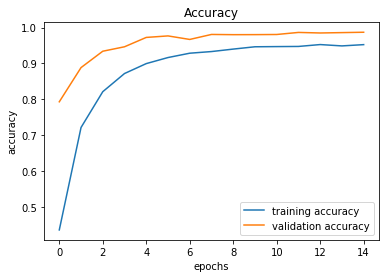

In [16]:

plt.figure(0)
plt.plot(history.history['acc'] , label = 'training accuracy')
plt.plot(history.history['val_acc'] , label = 'validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


test the accuracy of the model on test dataset

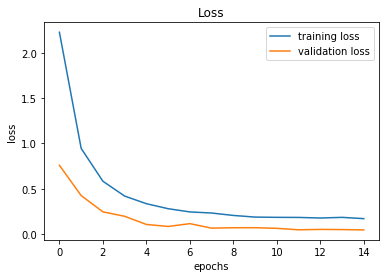

In [18]:
plt.figure(1)
plt.plot(history.history['loss'] , label = 'training loss')
plt.plot(history.history['val_loss'] , label = 'validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [21]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30) , Image.NEAREST)
    data.append(np.array(image))

x_test = np.array(data)
pred = model.predict_classes(x_test)

#accuracy from test data
print(accuracy_score(labels , pred))

model.save('traffic_classifier.h5')

0.936658749010293
